In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
bigmart=pd.read_csv("Data/train_bm.csv")

In [59]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: >

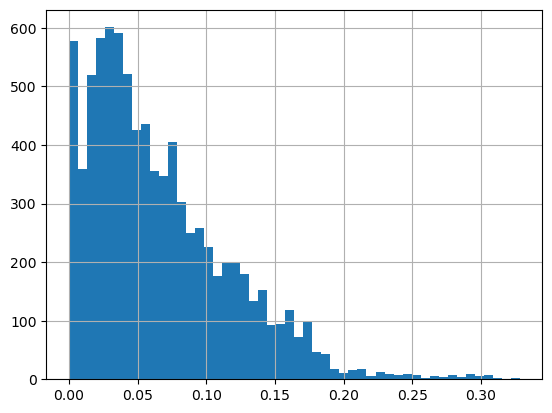

In [61]:
bigmart['Item_Visibility'].hist(bins=50)

In [62]:
item_visibility_squreroot=np.sqrt(bigmart['Item_Visibility'])

<Axes: >

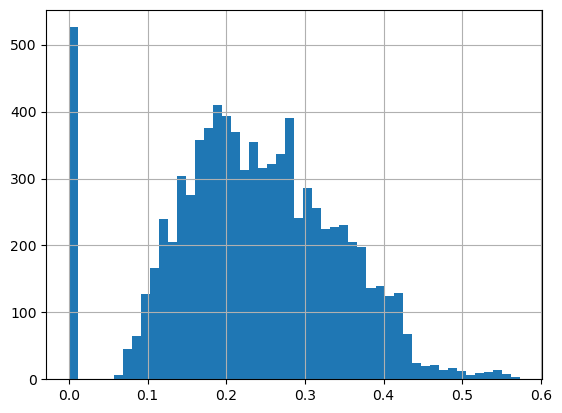

In [63]:
item_visibility_squreroot.hist(bins=50)

In [64]:
item_visibility_log = np.log(bigmart['Item_Visibility'])

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<Axes: >

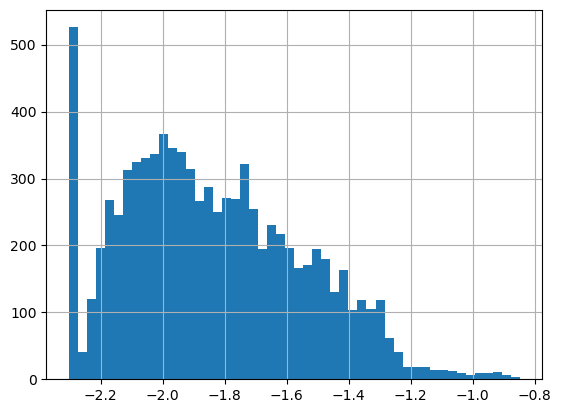

In [66]:
item_visibility_log = np.log(bigmart['Item_Visibility']+0.1)
item_visibility_log.hist(bins=50)

<Axes: >

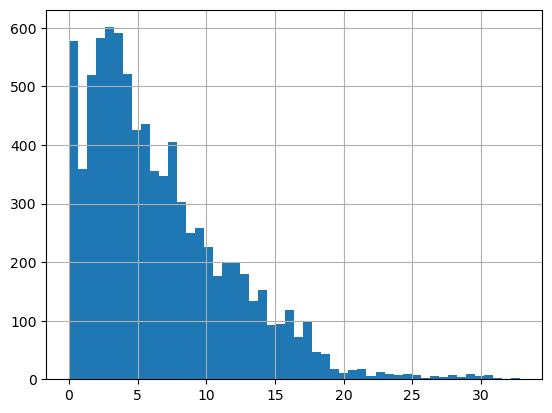

In [67]:
visibility = bigmart['Item_Visibility']*100
visibility.hist(bins=50)

In [68]:
log_visibility = np.log(visibility+1)

<Axes: >

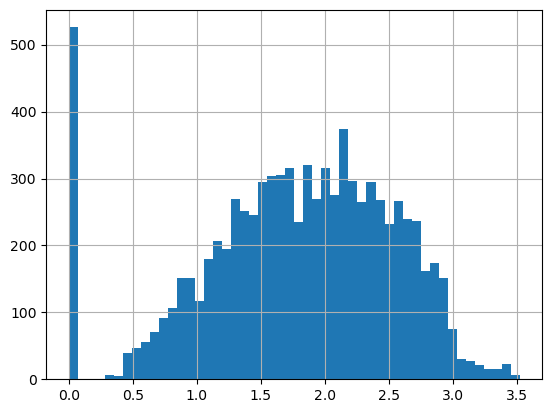

In [69]:
log_visibility.hist(bins=50)

## Feature preprocesssing

In [70]:
import pandas as pd
import numpy as np

In [71]:
bigmart=pd.read_csv("Data/train_bm.csv")

In [72]:
data = bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


## Featrure encoding

In [75]:
import pandas as pd

In [76]:
bigmart=pd.read_csv("Data/train_bm.csv")

In [77]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
bigmart.shape

(8523, 12)

In [79]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [80]:
bigmart['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [81]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


In [82]:
bigmart_encoded=pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [83]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,False
4,True,False,False


In [84]:
bigmart.shape, bigmart_encoded.shape

((8523, 12), (8523, 1605))

In [85]:
bigmart_encoded[['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25', 'Item_Identifier_DRB48',
       'Item_Identifier_DRC01', 'Item_Identifier_DRC12',
       'Item_Identifier_DRC13', 'Item_Identifier_DRC24',
       'Item_Identifier_DRC25', 'Item_Identifier_DRC27',
       'Item_Identifier_DRC36', 'Item_Identifier_DRC49',
       'Item_Identifier_DRD01', 'Item_Identifier_DRD12',
       'Item_Identifier_DRD13', 'Item_Identifier_DRD15',
       'Item_Identifier_DRD24', 'Item_Identifier_DRD25',
       'Item_Identifier_DRD27', 'Item_Identifier_DRD37',
       'Item_Identifier_DRD49']].head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
bigmart['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [88]:
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0], dtype=int64)

In [89]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [90]:
bigmart['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

## Combining Sparse classes

In [91]:
bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [92]:
bigmart['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [93]:
bigmart['Item_identifier_count'] = bigmart['Item_Identifier'].apply(lambda x: temp[x])
bigmart[['Item_Identifier','Item_identifier_count']].head()

,Item_Identifier,Item_identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [103]:
for i in range(0, len(bigmart)):
    if bigmart['Item_identifier_count'][i] < 4:
        bigmart['Item_Identifier'][i] = 'other'

C:\Users\HP\AppData\Local\Temp\ipykernel_14704\4014378179.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bigmart['Item_Identifier'][i] = 'other'
C:\Users\HP\AppData\Local\Temp\ipykernel_14704\4014378179.py:3: SettingWithCopyWarning: 
A 

In [95]:
bigmart.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifier_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,6
5,other,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,Tier 3,Supermarket Type2,556.6088,3
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,2.0,Tier 3,Supermarket Type1,343.5528,8


In [96]:
 bigmart['Item_Identifier'].value_counts()

Item_Identifier
other    418
FDG33     10
FDW13     10
FDW26      9
NCY18      9
        ... 
DRJ25      4
FDP32      4
FDQ28      4
FDJ07      4
FDD28      4
Name: count, Length: 1403, dtype: int64

## Feature Generation: Binning

In [97]:
import pandas as pd

In [98]:
stroke_data = pd.read_csv("Data/stroke prediction.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [99]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [100]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


In [101]:
bins=[0,49.5,66.5,77.5,90]
group=['Bin_1','Bin_2','Bin_3','Bin_4']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [102]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,Bin_1
1,58.0,Bin_2
2,8.0,Bin_1
3,70.0,Bin_3
4,14.0,Bin_1


## Feature Interaction

In [104]:
import pandas as pd

In [105]:
loan_data = pd.read_csv("Data/train_loan.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
loan_data['Total_income']=loan_data['ApplicantIncome']+ loan_data['CoapplicantIncome']
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_income']].head()

,ApplicantIncome,CoapplicantIncome,Total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


In [115]:
loan_data['loan_income_ratio']=loan_data['LoanAmount']/loan_data['CoapplicantIncome']
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'loan_income_ratio']].head()

,ApplicantIncome,CoapplicantIncome,loan_income_ratio
0,5849,0.0,NaN
1,4583,1508.0,0.084881
2,3000,0.0,inf
3,2583,2358.0,0.050891
4,6000,0.0,inf


## Generating Features: Missing Values

In [116]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [117]:
stroke_data = pd.read_csv("Data/stroke prediction.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [118]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [119]:
stroke_data["smoking_status_NA"]=stroke_data["smoking_status"].isnull()*1

In [120]:
stroke_data[['smoking_status_NA', 'smoking_status']].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


## Frequency Encoding

In [121]:
import pandas as pd

In [122]:
bigmart= pd.read_csv("Data/train_bm.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [124]:
bigmart['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [125]:
temp = bigmart['Item_Type'].value_counts()
temp.head()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64

In [126]:
bigmart['Item_type_count'] = bigmart['Item_Type'].apply(lambda x: temp[x])
bigmart[['Item_Identifier', 'Item_Type', 'Item_type_count']].head()

,Item_Identifier,Item_Type,Item_type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


In [127]:
bigmart[['Item_Type', 'Item_Outlet_Sales']].head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [128]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

##  Implementing DateTime Features

In [129]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [130]:
df = pd.read_csv("Data/No2 dataset.csv")
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [131]:
df['Date_Time'].max(),df['Date_Time'].min()

('31/08/2004 23.00.00', '01/04/2004 00.00.00')

In [133]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

In [135]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format= '%d/%m/%Y %H.%M.%S')
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

In [136]:
df['Date_Time'].max(), df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

In [137]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int32

In [138]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int32

In [139]:
df['Date_Time'].dt.dayofweek.head(7) 

0    2
1    2
2    2
3    2
4    2
5    2
6    3
Name: Date_Time, dtype: int32

In [141]:
df['Date_Time'].dt.dayofweek.head(7) 

0    2
1    2
2    2
3    2
4    2
5    2
6    3
Name: Date_Time, dtype: int32

In [151]:
df['Date_Time'].dt.day_name().head(7)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
5    Wednesday
6     Thursday
Name: Date_Time, dtype: object

In [144]:
df['Date_Time'].dt.month.head(7)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
Name: Date_Time, dtype: int32

In [147]:
df['Date_Time'].dt.is_month_end.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Date_Time, dtype: bool

In [155]:
new_df = pd.DataFrame({
    "year": df['Date_Time'].dt.year,
    "month": df['Date_Time'].dt.month,
    "day": df['Date_Time'].dt.day,
    "hour": df['Date_Time'].dt.hour,
    "dayofyear": df['Date_Time'].dt.dayofyear,
    "week": df['Date_Time'].dt.isocalendar().week,  # Updated
    "dayofweek": df['Date_Time'].dt.dayofweek,
    "dayofweekname": df['Date_Time'].dt.day_name(),  # Updated
    "quarter": df['Date_Time'].dt.quarter,
})

new_df.head()

,year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004,3,10,18,70,11,2,Wednesday,1
1,2004,3,10,19,70,11,2,Wednesday,1
2,2004,3,10,20,70,11,2,Wednesday,1
3,2004,3,10,21,70,11,2,Wednesday,1
4,2004,3,10,22,70,11,2,Wednesday,1


In [156]:
complete_data = pd.concat([df, new_df], axis=1)
complete_data.head()

,Date_Time,NO2(GT),year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004-03-10 18:00:00,166,2004,3,10,18,70,11,2,Wednesday,1
1,2004-03-10 19:00:00,1174,2004,3,10,19,70,11,2,Wednesday,1
2,2004-03-10 20:00:00,131,2004,3,10,20,70,11,2,Wednesday,1
3,2004-03-10 21:00:00,172,2004,3,10,21,70,11,2,Wednesday,1
4,2004-03-10 22:00:00,131,2004,3,10,22,70,11,2,Wednesday,1


In [157]:
complete_data['is_weekday']=0 

for i in range(0, len(complete_data)):
    if ((complete_data['dayofweek'][i] == 5) | (complete_data['dayofweek'][i] == 6)):
        complete_data['is_weekday'][i] = 0
    else: 
        complete_data['is_weekday'][i] = 1

In [158]:
complete_data[['dayofweek', 'is_weekday']].head()

,dayofweek,is_weekday
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


In [160]:
agent = pd.read_csv("Data/agent_classification.csv")
agent.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [161]:
agent[['Application_Receipt_Date','Applicant_BirthDate']].head()

,Application_Receipt_Date,Applicant_BirthDate
0,4/16/2007,12/19/1971
1,4/16/2007,2/17/1983
2,4/16/2007,1/16/1966
3,4/16/2007,2/3/1988
4,4/16/2007,7/4/1985


In [162]:
agent['Application_Receipt_Date'] = pd.to_datetime(agent['Application_Receipt_Date'], format='%m/%d/%Y')
agent['Applicant_BirthDate'] = pd.to_datetime(agent['Applicant_BirthDate'], format='%m/%d/%Y')

In [163]:
(agent['Application_Receipt_Date'][0] - agent['Applicant_BirthDate'][0]).days

12902

In [164]:
agent['Applicant_age'] = agent.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days, axis=1)